## Overview

The goal is to develop a machine learning algorithm that can forecast a student's performance in a class by analyzing student data. 
Since we require the labeled data in order to train our model, this problem is associated with supervised learning. Using supervised learning, a model gathers data from identifiers to generate predictions or conclusions. 

I will be working on a classification taskClassification input data entails putting it into groups or categories according to certain attributes. In this instance, the algorithm will use the student's final grade to determine whether or not they failed the course. . The model's performance will be evaluated using critical metrics such as recall, precision, accuracy, and F1 score in classification tasks. The ratio of accurate predictions to all of the model's predictions is known as accuracy. The ratio of correctly predicted positive outcomes to all correctly predicted positive outcomes produced by the model is known as accuracy. The percentage of true positive predictions to all actual positives in the dataset is known as recall. The F1 score creates a harmonic mean from recall and precision to provide a comprehensive assessment of model performance.n.

## Get the data

### Importing data

In [267]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
student_data = pd.read_csv('student-mat.csv')

### Size and type of data

In [270]:
# Checking the size of the dataset
print(student_data.shape)

# Checking the data types of each feature
print(student_data.dtypes)

(395, 35)
school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object


Above is the dataframes shape which is 395, 5 and all the features including the data types of each feature.  Below are the list of features with descriptions:

- school: Student's school 
- sex: Student's sex 
- age: Student's age 
- address: Student's home address type 
- famsize: Family size 
- Pstatus: Parent's cohabitation status 
- Medu: Mother's education 
- Fedu: Father's education 
- Mjob: Mother's job 
- Fjob: Father's job 
- reason: Reason to choose this school 
- guardian: Student's guardian 
- traveltime: Home to school travel time 
- studytime: Weekly study time 
- failures: Number of past class failures 
- schoolsup: Extra educational support 
- famsup: Family educational support 
- paid: Extra paid classes within the course subject 
- activities: Extra-curricular activities 
- nursery: Attended nursery school 
- higher: Wants to take higher education 
- internet: Internet access at home 
- romantic: With a romantic relationship 
- famrel: Quality of family relationships
- freetime: Free time after school 
- goout: Going out with friends 
- Dalc: Workday alcohol consumption 
- Walc: Weekend alcohol consumption
- health: Current health status 
- absences_G1: Number of school absences for G1 term 
- absences_G2: Number of school absences for G2 term 
- absences_G3: Number of school absences for G3 term 
- G1: First term grade 
- G2: Second term grade 
- G3: Final grade - target attribute

### Splitting the data

Below I will split the data into a 80-20 split, which means that 80% of the data will be used for training and 20% will be used for testing.

In [275]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = student_data.drop(columns=['G3'])  # Features
y = student_data['G3']  # Target

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploring the data

### Descriptive statistics


Below I will calculate summary statistics for numerical features to understand their central tendency, dispersion, and range.

In [280]:
print(student_data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  383.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.699739    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.280615    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

### Four visualizations

Below I have created 4 visulaizations using my training data to assist in exploring the data. 

The first visulaization I created is a scatter plot between a numerical feature, age and the target attribute, G3. Each point in the scatter plot represents a data instance, with the x-coordinate representing the value of age and the y-coordinate representing the value of G3. additinally the color of each point represents the sex of the student. For example, the sacatter plot below shows me students who got a 0.0 final grade were between ages 15-19 and were also mostly female.

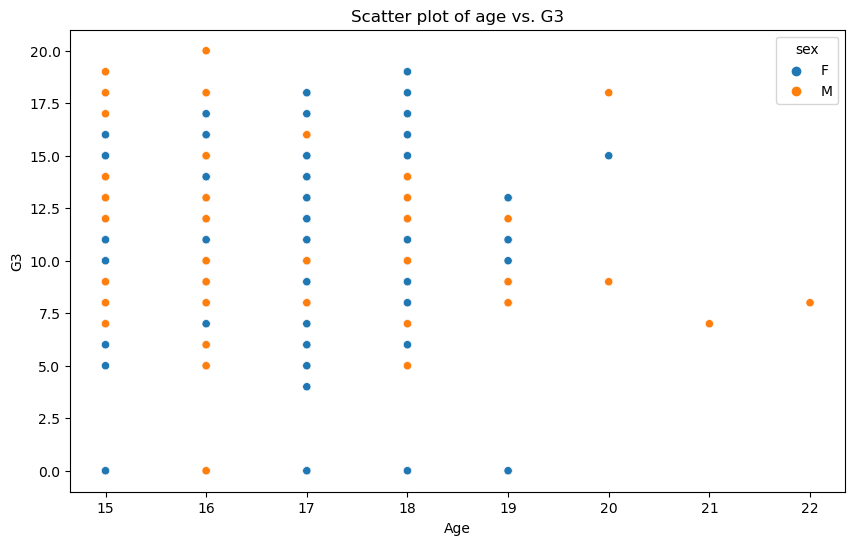

In [284]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='age', y='G3', hue='sex')
plt.title("Scatter plot of age vs. G3")
plt.xlabel("Age")
plt.ylabel("G3")
plt.legend(title='sex')
plt.show()

The second visulaization is a boxplot which is between students who want to take a higher education with final grades. We can see with the visulaization below that the sudents who did want to take a higher education got better final grades than ones who did not want to take the higher education.

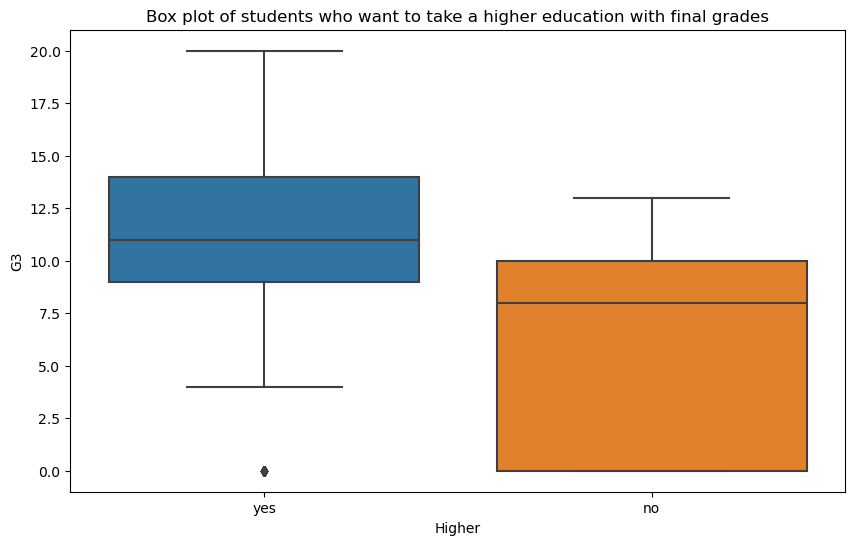

In [287]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_data, x='higher', y='G3')
plt.title("Box plot of students who want to take a higher education with final grades")
plt.xlabel("Higher")
plt.ylabel("G3")
plt.show()

The third visulaization is of a scatter plot but this scatter plot is between two numerical features, G1 and G3. As we saw with the correalteion heatmap G1 and G3 have a high correlation. Additionally, I included a regression line in the plot to indicate the trend or relationship between the two numerical features. The visulaion below shows that students whomight not have done the best in the first term had done alot better in the the last term.

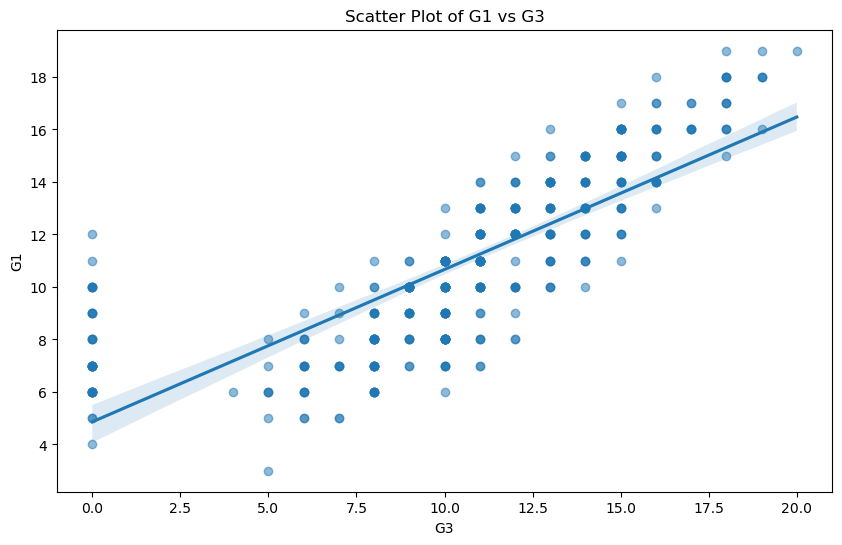

In [290]:
plt.figure(figsize=(10, 6))
sns.regplot(data=student_data, x='G3', y='G1', scatter_kws={'alpha':0.5})
plt.title("Scatter Plot of G1 vs G3")
plt.xlabel("G3")
plt.ylabel("G1")
plt.show()

The last visualization is a correlation heatmap which shows the correlation matrix of numerical features. Each box in the map represents the correlation coefficient between two features, ranging from -1 to 1. A high positive correlation which means it is close to 1 indicates a strong positive relationship, while a high negative correlation which is clsoe to -1 indicates a strong negative relationship. A correlation close to 0 suggests no linear relationship between the features. For example the visulaization below shows that our target attribute, G3 has a strong positive relationship with G1 which is the first term grade.

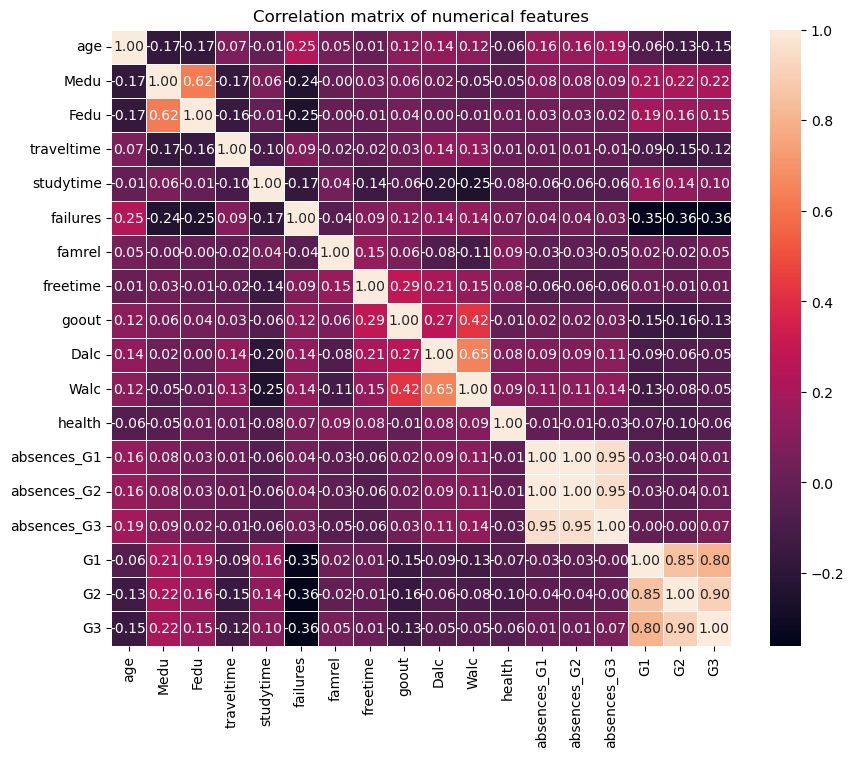

In [293]:
# Remove non-numeric columns before computing the correlation matrix
numeric_columns = student_data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = student_data[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# visualization #4
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix of numerical features")
plt.show()

## Prepare the data

### Feature selection

Below, I have used a custom transformer called the FeatureSelector class along with SelectKBest as a scoring function (f_regression) to select the top k features. Reducing the number of dimensions in the data can minimize overfitting and enhance model performance. To do this, I chose only the top k features.

In [298]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k=10):
        self.k = k
    
    def fit(self, X, y=None):
        self.selector = SelectKBest(score_func=f_regression, k=self.k)
        self.selector.fit(X, y)
        return self
    
    def transform(self, X):
        return self.selector.transform(X)
    
    def get_support(self):
        return self.selector.get_support()
    
    def get_selected_features(self, feature_names):
        return feature_names[self.get_support()]

### Custom Transformer

The AbsencesTransformer, a custom transformer I created, adds a new column to the data after adding the absences_G1, absences_G2, and absences_G3 data. It also removes the three previous columns. Another parameter in it sets the G1 and G2 columns to be removed from the data if it is equal to true; if it is equal to false, the columns stay.the data

In [302]:
# Custom transformer to sum absences and drop G1 and G2 columns 
class AbsencesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_g1_g2=True):
        self.drop_g1_g2 = drop_g1_g2
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            if 'absences_G1' in X.columns and 'absences_G2' in X.columns and 'absences_G3' in X.columns:
                if self.drop_g1_g2:
                    X['total_absences'] = X[['absences_G1', 'absences_G2', 'absences_G3']].sum(axis=1)
                    X = X.drop(columns=['G1', 'G2'])
            return X.values
        elif isinstance(X, np.ndarray):
            if self.drop_g1_g2:
                return np.hstack((
                    X, 
                    np.sum(X[:, [13, 14, 15]], axis=1).reshape(-1, 1) if X.shape[1] >= 16 else X
                ))
            else:
                return X

### Fill in missing values, feature scaling and One-hot encoding

Below I have done the preprocessing step. Preprocessing methods prepare the data for machine learning models by cleaning it up. This includes encoding categorical variables, scaling numerical features, and handling missing values. To avoid problems during model training, the SimpleImputer fills in the missing values. Several algorithms require that numerical features have a mean of 0 and a standard deviation of 1, which can only be achieved by normalizing the data using the StandardScaler in the numerical_transformer. The categorical features are then transformed into a format that machine learning algorithms can use to improve their prediction performance by the OneHotEncoder in the categorical transformer.

In [306]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                        'nursery', 'higher', 'internet', 'romantic']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # fills in missing valuse using the mean
    ('scaler', StandardScaler()) # normalizes numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # fills in missing values according to the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # converts categorical features
])


### Column Transformer

Below I Created a Column Transformer to transform  numeric and categorical dat.a

In [310]:
preprocessor = ColumnTransformer(  #combines transfomers using the column transformer
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Data Pipeline

I made two distinct transformation pipelines as shown below. There are two versions: one with the G1 and G2 columns and one without. Simplify feature selection and preprocessing to improve workflow efficiency and repeatability.

In [314]:
# Define two separate pipelines for transformations with and without G1/G2 columns
pipeline_with_g1_g2 = Pipeline(steps=[  # with G1 and G2 columns
    ('preprocessor', preprocessor),
    ('absences_sum', AbsencesTransformer(drop_g1_g2=True)),
    ('feature_selection', SelectKBest(score_func=f_regression, k=10))
])

pipeline_without_g1_g2 = Pipeline(steps=[  # without G1 and G2 columns
    ('preprocessor', preprocessor),
    ('absences_sum', AbsencesTransformer(drop_g1_g2=False)),
    ('feature_selection', SelectKBest(score_func=f_regression, k=10))
])

### Transform training data

I created two distinct models by transforming the training data as shown below. There are two versions: one with the G1 and G2 columns and one without. The transformed training data's shape yields the following results: (316, 12) for the training data with the G1 and G2 columns, and (316, 10) for the training data without them. This demonstrates that the G1 and G2 columns were appropriately removed by my custom transformer.

In [318]:
X_train_with_g1_g2 = pipeline_with_g1_g2.fit_transform(X_train, y_train) #transfomed training data with G1 and G2 columns
X_train_without_g1_g2 = pipeline_without_g1_g2.fit_transform(X_train, y_train) #transfomerd tarining data without G1 nad G2 columns

# Output the shape of the transformed training data
print(X_train_with_g1_g2.shape)
print(X_train_without_g1_g2.shape)

(316, 10)
(316, 10)


## Shortlist promising models

The next step is to fit the models and compare them using cross validation.

### Fiiting Models 

Below I compare the performance of three different algorithms—Linear Regression, Random Forest, and Gradient Boosting and choose the best one. Afterwards, I fitted the models to the training data, which included the columns G1 and G2.

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Fit the models with G1 and G2 columns
linear_regression_model.fit(X_train_with_g1_g2, y_train)
random_forest_model.fit(X_train_with_g1_g2, y_train)
gradient_boosting_model.fit(X_train_with_g1_g2, y_train)


GradientBoostingRegressor(random_state=42)

### Comparing models

The function model_evaluation, which I define below, makes sure that the model's performance is dependable and independent of a particular train-test split. Then I assess the models evaluating models that have and do not have G1 and G2 in order to gauge their significance. 

In [328]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation
def evaluate_model(model, X, y):
    scores_with_g1_g2 = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -scores_with_g1_g2.mean()

# Evaluate models with and without G1 and G2 columns
linear_regression_score_with_g1_g2 = evaluate_model(linear_regression_model, X_train_with_g1_g2, y_train)
random_forest_score_with_g1_g2 = evaluate_model(random_forest_model, X_train_with_g1_g2, y_train)
gradient_boosting_score_with_g1_g2 = evaluate_model(gradient_boosting_model, X_train_with_g1_g2, y_train)

linear_regression_score_without_g1_g2 = evaluate_model(linear_regression_model, X_train_without_g1_g2, y_train)
random_forest_score_without_g1_g2 = evaluate_model(random_forest_model, X_train_without_g1_g2, y_train)
gradient_boosting_score_without_g1_g2 = evaluate_model(gradient_boosting_model, X_train_without_g1_g2, y_train)

# Output the results
print("Model\t\t\tWith G1/G2\tWithout G1 and G2")
print("Linear Regression:\t{:.4f}\t\t{:.4f}".format(linear_regression_score_with_g1_g2, linear_regression_score_without_g1_g2))
print("Random Forest:\t\t{:.4f}\t\t{:.4f}".format(random_forest_score_with_g1_g2, random_forest_score_without_g1_g2))
print("Gradient Boosting:\t{:.4f}\t\t{:.4f}".format(gradient_boosting_score_with_g1_g2, gradient_boosting_score_without_g1_g2))


Model			With G1/G2	Without G1 and G2
Linear Regression:	3.6393		3.6854
Random Forest:		3.3933		4.6972
Gradient Boosting:	3.0971		4.3439


## Finetune the system

I have selected one model below that I can use to accurately adjust the hyperparameters that change the testing data using the data preparation pipelines. After that, I'll select the best model and evaluate how well it works with the test set.est set

### Transform testing data

Below is the correctly transformed testing data using the  data preparation pipelins).

In [333]:
X_test_with_g1_g2 = pipeline_with_g1_g2.transform(X_test)
X_test_without_g1_g2 = pipeline_without_g1_g2.transform(X_test)

print(X_test_with_g1_g2.shape)
print(X_test_without_g1_g2.shape)

(79, 10)
(79, 10)


### Gradient boosting model and grid search with and without G1/G2

I've chosen the gradient boosting regression model below so I can assess how well it performs on the test data. The goal of this step is to optimize the performance of the Gradient Boosting Regressor by finding the optimal set of hyperparameters through a rigorous search and cross-validation procedure. By executing grid search with and without these features, we can evaluate how the G1 and G2 features affect the model's performance and determine which feature set is optimal for target variable prediction..

In [336]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation for the model with G1 and G2
grid_search_with_g1_g2 = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_with_g1_g2.fit(X_train_with_g1_g2, y_train)

# Perform grid search with cross-validation for the model without G1 and G2
grid_search_without_g1_g2 = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_without_g1_g2.fit(X_train_without_g1_g2, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

### Final model and it's performance on the test set

I've selected my final model and used the test data below to assess its performance. The purpose of these steps is to evaluate the best models performance with and without G1 and G2 columns on the test set. By comparing the Mean Squared Error of the two models, we can determine the impact of adding G1 and G2 features on the model's performance. This helps us understand whether the additional features improve the model's performance or if they actually add significant predictive power..

In [341]:
from sklearn.metrics import mean_squared_error
best_model_with_g1_g2 = grid_search_with_g1_g2.best_estimator_
best_model_without_g1_g2 = grid_search_without_g1_g2.best_estimator_

# Measure performance on the test set
y_pred_with_g1_g2 = best_model_with_g1_g2.predict(X_test_with_g1_g2)
y_pred_without_g1_g2 = best_model_without_g1_g2.predict(X_test_without_g1_g2)

mse_with_g1_g2 = mean_squared_error(y_test, y_pred_with_g1_g2)
mse_without_g1_g2 = mean_squared_error(y_test, y_pred_without_g1_g2)

# output of best hyperparameters and MSE model without G1 and G2 columns
print(f"With G1 and G2: {grid_search_with_g1_g2.best_params_}")
print(f"Mean Squared Error with G1 and G2: {mse_with_g1_g2}")

# output of best hyperparameters and MSE model without G1 and G2 columns
print(f"Without G1 and G2: {grid_search_without_g1_g2.best_params_}")
print(f"Mean Squared Error without G1 and G2: {mse_without_g1_g2}")


With G1 and G2: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error with G1 and G2: 3.3055630276362673
Without G1 and G2: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error without G1 and G2: 4.838868664173753


## Presenting the solution

My project's goal was to predict students' final grades using different features from the student-mat.csv dataset. My research indicates that final grades were significantly predicted by prior academic performance (G1 and G2). The success of this project is demonstrated by the fact that the use of G1 and G2 greatly increased model accuracy and that Gradient Boosting outperformed all other tested models. The complexity of the dataset presented some difficulties for me in finishing this project, particularly in relation to the missing values and categorical encoding. If this project were to go on, I would look into possible add-on features like parental involvement or psychological aspects with the target feature. Taking everything into account, this project showed how crucial it is to comprehend the numerous aspects that influence students' performance and offered a reliable technique for estimating final grades.